# Entire DB Schema Stats for different datasets

In [1]:
import json

def analyze_schema(filepath: str):
    with open(filepath, 'r', encoding='utf-8') as file:
        schema_data = json.load(file)
    
    # Iterate through each database to count the number of tables, total columns, and foreign keys.
    for database in schema_data:
        table_count = len(database.get("tables", []))
        column_count = sum(len(table.get("columns", [])) for table in database.get("tables", []))
        foreign_key_count = len(database.get("foreign_keys", []))
        
        # Record the statistics in each database object
        database["table_count"] = table_count
        database["total_column_count"] = column_count
        database["foreign_key_count"] = foreign_key_count
    
    with open(filepath, 'w', encoding='utf-8') as file:
        json.dump(schema_data, file, indent=2, ensure_ascii=False)



In [3]:
# Config of paths
with open('../config.json') as config_file:
    config = json.load(config_file)

In [7]:
import os

analyze_schema(os.path.join("..", config['db_schema_paths']['spider_schemas']))
analyze_schema(os.path.join("..", config['db_schema_paths']['bird_train_schemas']))
analyze_schema(os.path.join("..", config['db_schema_paths']['bird_dev_schemas']))
analyze_schema(os.path.join("..", config['db_schema_paths']['spider2_lite_schemas']))

In [8]:
import json
import matplotlib.pyplot as plt

def plot_statistic_distribution(filepath: str, statistic: str):
    with open(filepath, 'r', encoding='utf-8') as file:
        schema_data = json.load(file)

    # Extract the required statistics
    statistic_values = [database.get(statistic, 0) for database in schema_data]
    
    # Calculate the frequency distribution of the statistic
    value_counts = {}
    for value in statistic_values:
        if value in value_counts:
            value_counts[value] += 1
        else:
            value_counts[value] = 1
    
    # Extract abscissa and ordinate data
    x_values = sorted(value_counts.keys())
    y_values = [value_counts[x] for x in x_values]

    # Draw a histogram
    plt.figure(figsize=(10, 3))
    plt.bar(x_values, y_values, width=0.8, color='skyblue', edgecolor='black')
    plt.xlabel(statistic)
    plt.ylabel('Count')
    plt.title(f'Distribution of {statistic}')
    plt.xticks(x_values)
    plt.grid(axis='y')
    plt.tight_layout()

    plt.show()


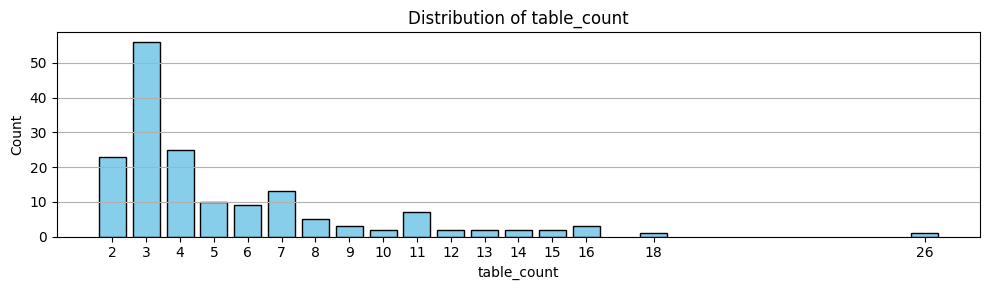

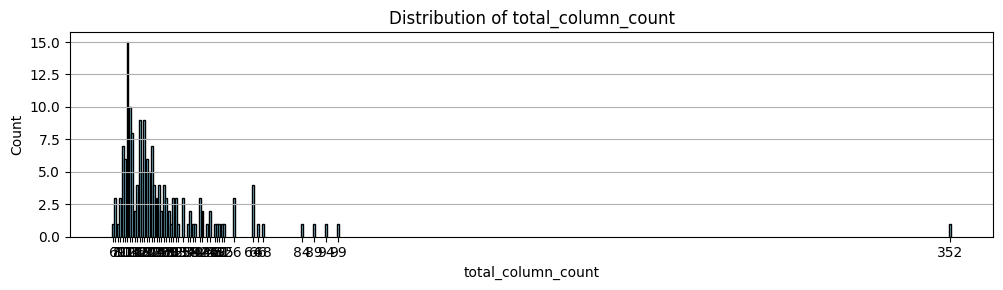

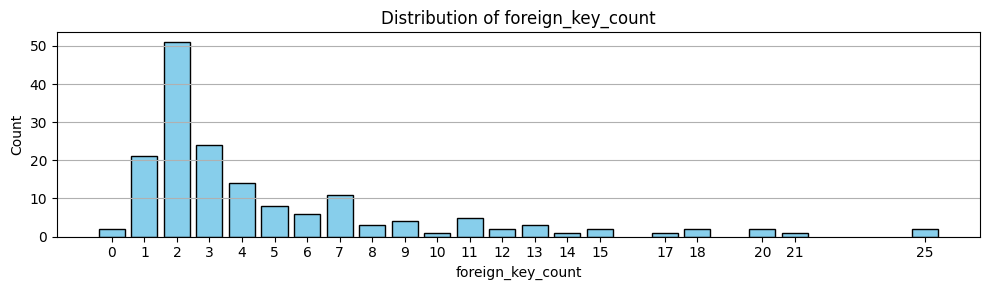

In [10]:
plot_statistic_distribution(os.path.join("..", config['db_schema_paths']['spider_schemas']), 'table_count')
plot_statistic_distribution(os.path.join("..", config['db_schema_paths']['spider_schemas']), 'total_column_count')
plot_statistic_distribution(os.path.join("..", config['db_schema_paths']['spider_schemas']), 'foreign_key_count')

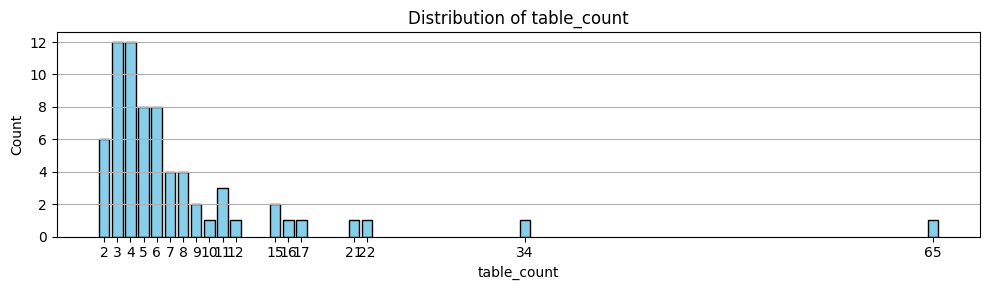

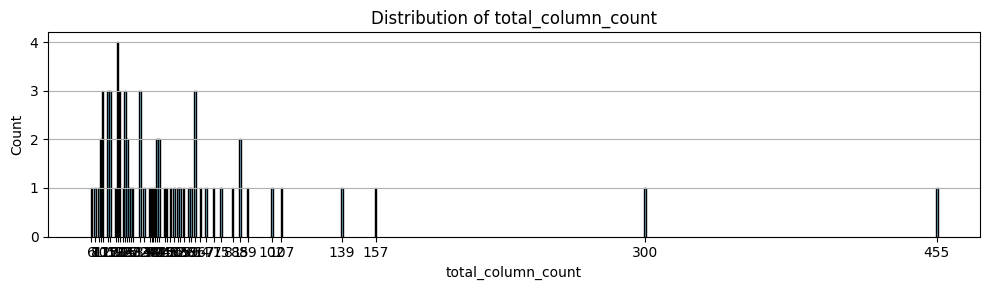

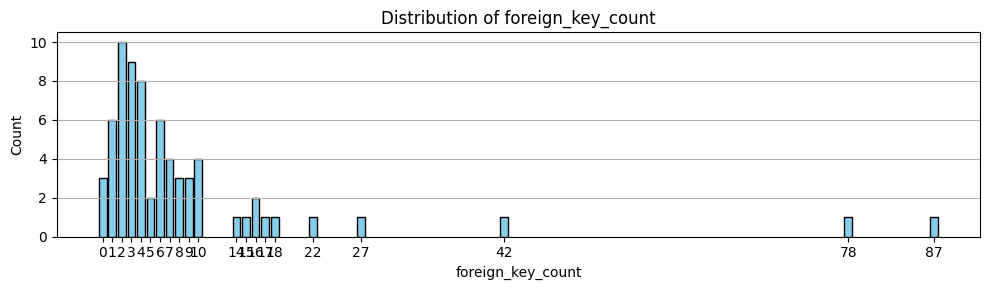

In [11]:
plot_statistic_distribution(os.path.join("..", config['db_schema_paths']['bird_train_schemas']), 'table_count')
plot_statistic_distribution(os.path.join("..", config['db_schema_paths']['bird_train_schemas']), 'total_column_count')
plot_statistic_distribution(os.path.join("..", config['db_schema_paths']['bird_train_schemas']), 'foreign_key_count')

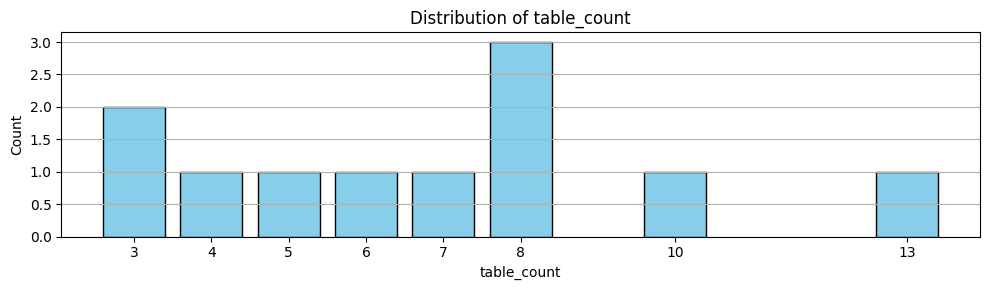

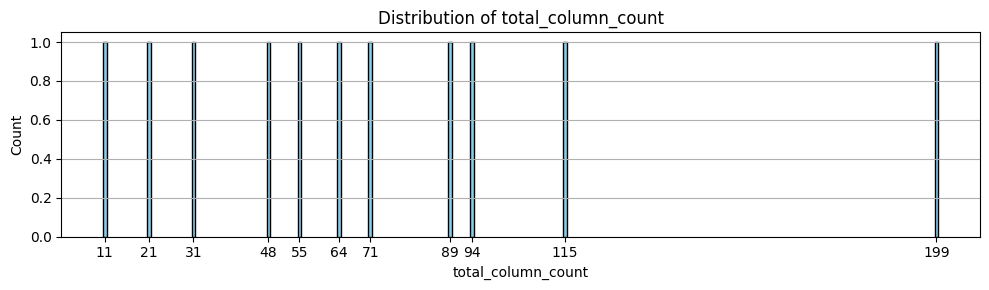

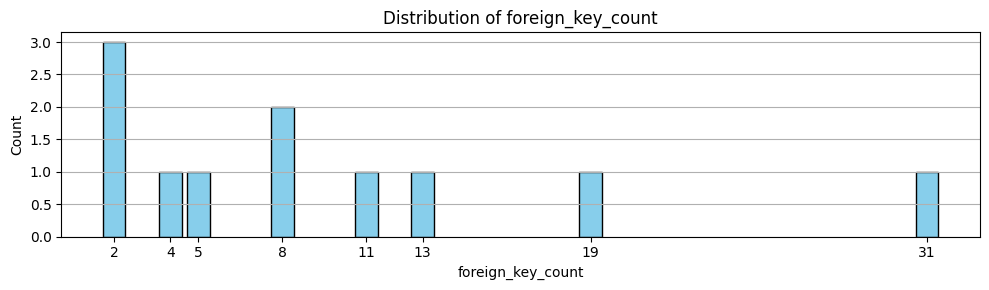

In [13]:
plot_statistic_distribution(os.path.join("..", config['db_schema_paths']['bird_dev_schemas']), 'table_count')
plot_statistic_distribution(os.path.join("..", config['db_schema_paths']['bird_dev_schemas']), 'total_column_count')
plot_statistic_distribution(os.path.join("..", config['db_schema_paths']['bird_dev_schemas']), 'foreign_key_count')

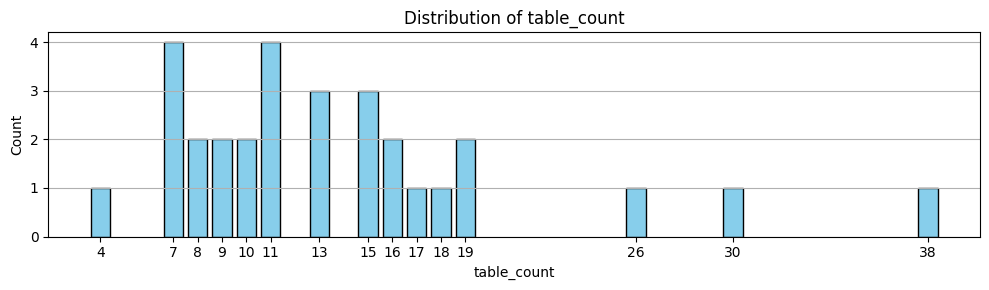

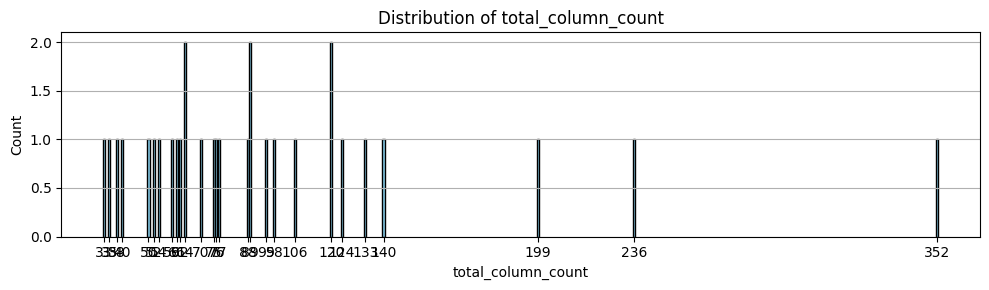

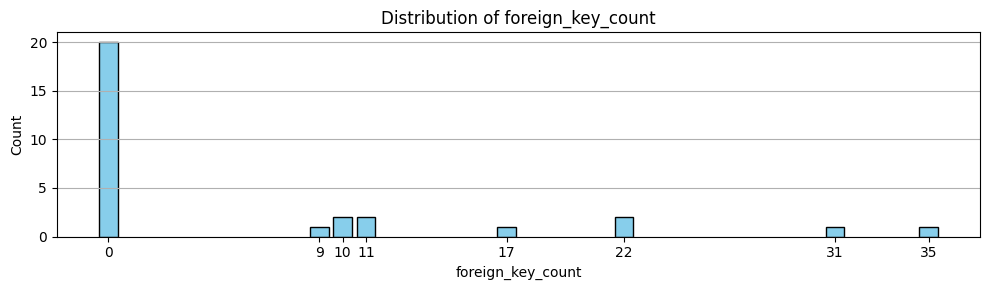

In [14]:
plot_statistic_distribution(os.path.join("..", config['db_schema_paths']['spider2_lite_schemas']), 'table_count')
plot_statistic_distribution(os.path.join("..", config['db_schema_paths']['spider2_lite_schemas']), 'total_column_count')
plot_statistic_distribution(os.path.join("..", config['db_schema_paths']['spider2_lite_schemas']), 'foreign_key_count')